In [3]:
from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import MinMaxScaler #for various scaling methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices

In [4]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [5]:
df = pd.read_csv('classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,0.0,1025,10,99,2016,3,0


In [7]:
df.shape

(155223, 19)

In [8]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

In [9]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [10]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [11]:
df.shape

(75345, 19)

## Feature Scaling

In [12]:
feature_scale = [feature for feature in df.columns if feature not in ['Target']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

data.head()

,Target,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
0,1,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.000000,0.602941,1.0,0.531429,0.333333,0.181818
1,0,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.000000,0.602941,1.0,0.531429,0.333333,0.181818
2,0,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.000000,0.705882,1.0,0.274286,0.333333,0.181818
3,1,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.000000,0.705882,1.0,0.274286,0.333333,0.181818
4,0,0.505636,0.196981,0.742734,0.611940,0.731343,0.0,0.432258,0.26,0.792453,0.175824,0.61,0.763441,0.097011,0.558824,0.8,0.291429,0.333333,0.272727


# Train Test split

In [13]:
X = data.drop('Target',axis=1)
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10,stratify=y) #train test split in 50:50 ratio

In [14]:
X_train.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
9747,0.002883,0.588673,0.563257,0.537313,0.597015,0.0,0.625806,0.34,0.698113,0.087912,0.47,0.849462,0.006155,0.529412,0.6,0.437143,0.333333,0.090909
26293,0.000128,0.565977,0.552531,0.626866,0.701493,0.0,0.554839,0.48,0.849057,0.054945,0.56,0.881720,0.118406,0.558824,0.7,0.742857,0.333333,0.363636
41021,0.004803,0.645345,0.577569,0.791045,0.850746,0.0,0.625806,0.81,0.924528,0.252747,0.18,0.623656,0.007327,0.470588,1.0,0.225714,0.333333,0.636364
12705,0.001296,0.579009,0.530510,0.671642,0.701493,0.0,0.625806,0.14,0.792453,0.065934,0.21,0.731183,0.027550,0.529412,0.9,0.600000,0.333333,0.181818
48883,0.000317,0.582719,0.525652,0.641791,0.656716,0.0,0.625806,0.02,0.754717,0.021978,0.33,0.698925,0.030481,0.544118,0.9,0.397143,0.333333,0.818182


# AdaBoostClassifier

In [15]:
adaboostModel1 = AdaBoostClassifier()
adaboostModel1.fit(X_train, y_train)
adapred1 = adaboostModel1.predict(X_test)
print('Accuracy of AdaBoost :{:.4f}'.format(accuracy_score(y_test,adapred1)))
print('Accuracy of training data :{:.4f}'.format(adaboostModel1.score(X_train, y_train)))
print(confusion_matrix(y_test,adapred1))
print(classification_report(y_test,adapred1))

Accuracy of AdaBoost :0.5989
Accuracy of training data :0.6017
[[15218  5149]
 [ 9963  7343]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67     20367
           1       0.59      0.42      0.49     17306

    accuracy                           0.60     37673
   macro avg       0.60      0.59      0.58     37673
weighted avg       0.60      0.60      0.59     37673



### K Fold Cross Validation

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validation=KFold(10)

model = AdaBoostClassifier() 
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print('Max :',np.max(results))
print('Min :',np.min(results))
print('Mean :',np.mean(results))

[0.55580624 0.57876576 0.56416722 0.55527538 0.55567352 0.55402177
 0.54459782 0.48885054 0.43217414 0.52243164]
Max : 0.5787657597876577
Min : 0.43217414388107245
Mean : 0.5351764044581617


### Stratified K-fold Cross Validation

In [14]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model = AdaBoostClassifier() 
scores=cross_val_score(model,X,y,cv=skfold)
print(scores)
print('Max :',np.max(scores))
print('Min :',np.min(scores))
print('Mean :',np.mean(scores))

[0.44910418 0.4512276  0.31599204 0.26994028 0.18606503 0.06331298
 0.10645076 0.21170693 0.33806743 0.46840988]
Max : 0.46840987523228034
Min : 0.06331298115211044
Mean : 0.2860277099929556


## Graphical Analysis

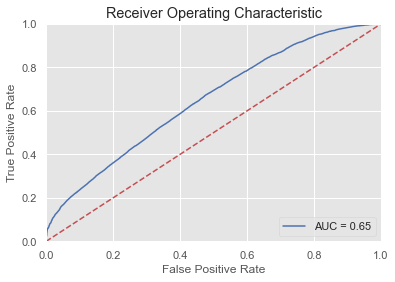

In [14]:
from sklearn.metrics import roc_curve, auc

probs               = adaboostModel1.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Hyper parameter tuning

## 1. Explore the number of trees
An important hyperparameter for Adaboost is n_estimator. Often by changing the number of base models or weak learners we can adjust the accuracy of the model. The number of trees added to the model must be high for the model to work well, often hundreds, if not thousands. Afterall the more is the number of weak learners, the more the model will change from being high biased to low biased.

In [22]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000]
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1,verbose=2)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model,  X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean
                               (scores), std(scores)))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>10 0.587 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>50 0.595 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>100 0.597 (0.006)
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.5s
[CV]  ................................................................
[CV] ................................................. , total=   0.5s
[CV]  ................................................................
[CV] ................................................. , t

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>500 0.597 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>1000 0.599 (0.006)
>5000 0.601 (0.006)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 59.2min finished


- n_estimators=10 0.587 (0.005)
- n_estimators=50 0.595 (0.005)
- n_estimators=100 0.597 (0.006)
- n_estimators=500 0.597 (0.005)
- n_estimators=1000 0.599 (0.004)
- n_estimators=5000 0.601 (0.005)

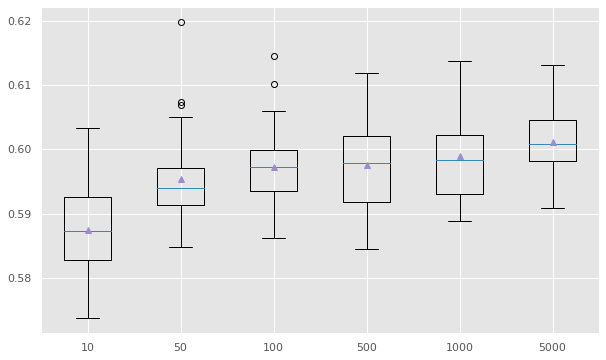

In [23]:
# plot model performance for comparison
pyplot.figure(figsize=(10,6))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## 2. Explore Weak Learner
As we know Adaboost uses a series of weak learners and makes the final prediction depending upon the weighted say of these weak learners. So let’s explore the weak learner. We basically are exploring the depth of the decision tree.

In [25]:
# explore adaboost ensemble tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 10
    for i in range(1,11):
        # define base model
        base = DecisionTreeClassifier(max_depth=i)
        # define ensemble model
        models[str(i)] = AdaBoostClassifier(base_estimator=base)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model,  X_train, y_train):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, verbose=2)
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model,  X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   37.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>1 0.595 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   59.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>2 0.600 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>3 0.598 (0.007)
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.7s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , tot

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>4 0.583 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>5 0.569 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>6 0.545 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>7 0.514 (0.009)

[CV]  ................................................................
[CV] ................................................. , total=   6.8s
[CV]  ................................................................
[CV] ................................................. , total=   7.9s
[CV]  ................................................................
[CV] ................................................. , total=   8.6s
[CV]  ................................................................
[CV] ................................................. , total=   8.2s
[CV]  ................................................................
[CV] ................................................. , total=   8.5s
[CV]  ................................................................
[CV] ................................................. , total=   9.2s
[CV]  ................................................................
[CV] ................................................. , to

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>8 0.479 (0.008)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>9 0.448 (0.009)
>10 0.435 (0.006)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.2min finished


- max_depth=1 0.595 
- max_depth=2 0.600 
- max_depth=3 0.598 
- max_depth=4 0.583 
- max_depth=5 0.569 
- max_depth=6 0.545 
- max_depth=7 0.514 
- max_depth=8 0.479 
- max_depth=9 0.448 
- max_depth=10 0.435 



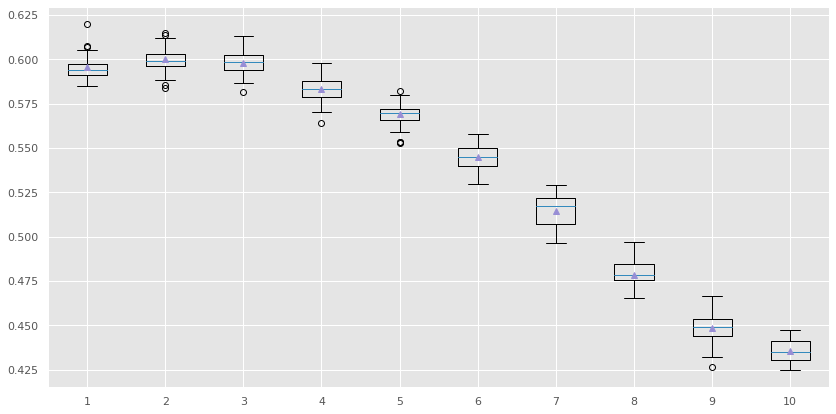

In [26]:
# plot model performance for comparison
plt.figure(figsize=(14,7))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

We see here, with the increase in depths, the accuracy is increasing till max depth of 2 and the accuracy is 60 percent. Then accuracy goes on decreasing

## 3. Explore Learning Rate
The learning rate controls the loss function used for calculating the weight of the base models.
- Weight=learning rate*log(1-e/e), where e is the error

In [27]:
# explore adaboost ensemble learning rate effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for i in arange(0.1, 2.1, 0.1):
        key = '%.3f' % i
        models[key] = AdaBoostClassifier(learning_rate=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model,  X_train, y_train):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model,  X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, verbose=2)
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model,  X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>0.100 0.586 (0.006)

[CV]  ................................................................
[CV] ................................................. , total=  13.2s
[CV]  ................................................................
[CV] ................................................. , total=  13.9s
[CV]  ................................................................
[CV] ................................................. , total=  13.1s
[CV]  ................................................................
[CV] ................................................. , total=  13.6s
[CV]  ................................................................
[CV] ................................................. , total=  14.8s
[CV]  ................................................................
[CV] ................................................. , total=  14.5s
[CV]  ................................................................
[CV] ................................................. 

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   36.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>0.200 0.593 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   36.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>0.300 0.596 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>0.400 0.597 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>0.500 0.597 (0.007)

[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.5s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.3s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.9s
[CV]  ................................................................
[CV] ................................................. 

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>0.600 0.598 (0.006)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>0.700 0.597 (0.006)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>0.800 0.597 (0.006)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>0.900 0.596 (0.006)

[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.6s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.9s
[CV]  ................................................................
[CV] ................................................. 

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>1.000 0.595 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>1.100 0.595 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>1.200 0.595 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>1.300 0.595 (0.007)

[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.6s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.8s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. 

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>1.400 0.594 (0.006)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>1.500 0.594 (0.006)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>1.600 0.595 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>1.700 0.595 (0.007)

[CV]  ................................................................
[CV] ................................................. , total=   2.4s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.8s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.5s
[CV]  ................................................................
[CV] ................................................. , total=   2.4s
[CV]  ................................................................
[CV] ................................................. 

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>1.800 0.596 (0.007)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   34.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


>1.900 0.588 (0.007)
>2.000 0.537 (0.031)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.1s finished


- LR=0.100 0.586 (0.004)
- LR=0.200 0.593 (0.004)
- LR=0.300 0.596 (0.005)
- LR=0.400 0.597 (0.005)
- LR=0.500 0.597 (0.004)
- LR=0.600 0.598 (0.005)
- LR=0.700 0.597 (0.005)
- LR=0.800 0.597 (0.005)
- LR=0.900 0.596 (0.005)
- LR=1.000 0.595 (0.005)
- LR=1.100 0.595 (0.005)
- LR=1.200 0.595 (0.006)
- LR=1.300 0.595 (0.006)
- LR=1.400 0.594 (0.005)
- LR=1.500 0.594 (0.006)
- LR=1.600 0.595 (0.004)
- LR=1.700 0.595 (0.005)
- LR=1.800 0.596 (0.004)
- LR=1.900 0.598 (0.006)
- LR=2.000 0.537 (0.047)

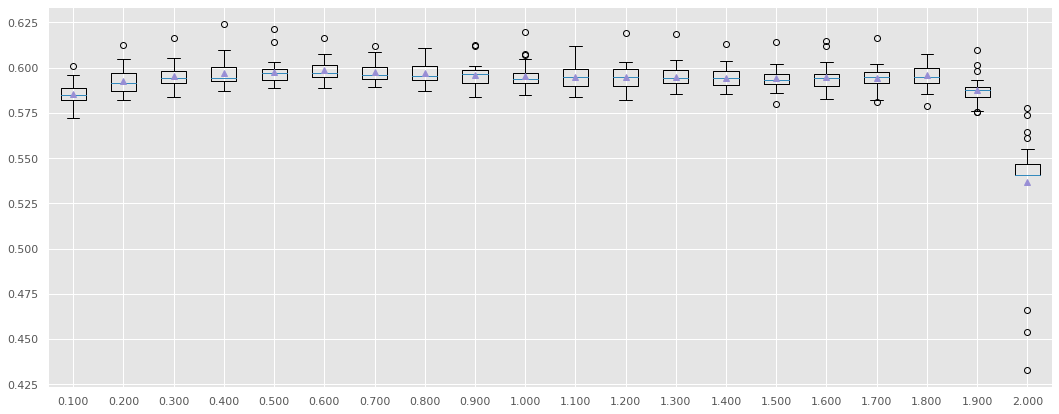

In [28]:
# plot model performance for comparison
plt.figure(figsize=(18,7))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

As we can see the best accuracy is for learning rate 0.60. Greater than this the accuracy seems to be decreasing thus giving the indication of overfitting.

## 4. Using GridSearchCV

In [29]:
# example of grid searching key hyperparameters for adaboost on a classification dataset
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = KFold(n_splits=10)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',verbose=2)
# execute the grid search

grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.6s
[CV]  ................................................................
[CV] ................................................. , total=   2.9s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV] 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min



[CV] learning_rate=0.0001, n_estimators=100 ..........................
[CV] ........... learning_rate=0.0001, n_estimators=100, total=   5.4s
[CV] learning_rate=0.0001, n_estimators=500 ..........................
[CV] ........... learning_rate=0.0001, n_estimators=500, total=  22.9s
[CV] learning_rate=0.0001, n_estimators=500 ..........................
[CV] ........... learning_rate=0.0001, n_estimators=500, total=  23.4s
[CV] learning_rate=0.0001, n_estimators=500 ..........................
[CV] ........... learning_rate=0.0001, n_estimators=500, total=  23.8s
[CV] learning_rate=0.0001, n_estimators=500 ..........................
[CV] ........... learning_rate=0.0001, n_estimators=500, total=  22.9s
[CV] learning_rate=0.0001, n_estimators=500 ..........................
[CV] ........... learning_rate=0.0001, n_estimators=500, total=  23.5s
[CV] learning_rate=0.001, n_estimators=10 ............................
[CV] ............. learning_rate=0.001, n_estimators=10, total=   0.5s
[CV] 

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 12.8min finished


Best: 0.598906 using {'learning_rate': 0.1, 'n_estimators': 500}
0.551869 (0.008181) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.554231 (0.007341) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.555214 (0.007265) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.556727 (0.008353) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.555214 (0.007265) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.556727 (0.008353) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.566681 (0.007193) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.568778 (0.007464) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.566681 (0.007193) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.569017 (0.007357) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.572892 (0.006700) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.583723 (0.010428) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.573848 (0.006785) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.584572

In [30]:
accuracy = grid_result.best_score_
accuracy

0.598906478881019

In [31]:
grid_result.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

## Model with parameters
Trying with different parameters

In [15]:
adaboostModel2 = AdaBoostClassifier(learning_rate=0.1,n_estimators=500)
adaboostModel2.fit(X_train, y_train)
adapred2 = adaboostModel2.predict(X_test)
print('Accuracy of AdaBoost :{:.4f}'.format(accuracy_score(y_test,adapred2)))
print(confusion_matrix(y_test,adapred2))
print(classification_report(y_test,adapred2))

Accuracy of AdaBoost :0.5986
[[15588  4779]
 [10342  6964]]
              precision    recall  f1-score   support

           0       0.60      0.77      0.67     20367
           1       0.59      0.40      0.48     17306

    accuracy                           0.60     37673
   macro avg       0.60      0.58      0.58     37673
weighted avg       0.60      0.60      0.58     37673



In [16]:
adaboostModel2 = AdaBoostClassifier(learning_rate=0.1,n_estimators=1000)
adaboostModel2.fit(X_train, y_train)
adapred2 = adaboostModel2.predict(X_test)
print('Accuracy of AdaBoost :{:.4f}'.format(accuracy_score(y_test,adapred2)))
print('Accuracy of training data :{:.4f}'.format(adaboostModel2.score(X_train, y_train)))
print(confusion_matrix(y_test,adapred2))
print(classification_report(y_test,adapred2))

Accuracy of AdaBoost :0.5998
Accuracy of training data :0.6036
[[15264  5103]
 [ 9974  7332]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67     20367
           1       0.59      0.42      0.49     17306

    accuracy                           0.60     37673
   macro avg       0.60      0.59      0.58     37673
weighted avg       0.60      0.60      0.59     37673



In [17]:
adaboostModel2 = AdaBoostClassifier(learning_rate=0.1,n_estimators=5000)
adaboostModel2.fit(X_train, y_train)
adapred2 = adaboostModel2.predict(X_test)
print('Accuracy of AdaBoost :{:.4f}'.format(accuracy_score(y_test,adapred2)))
print(confusion_matrix(y_test,adapred2))
print(classification_report(y_test,adapred2))

Accuracy of AdaBoost :0.6005
[[14799  5568]
 [ 9481  7825]]
              precision    recall  f1-score   support

           0       0.61      0.73      0.66     20367
           1       0.58      0.45      0.51     17306

    accuracy                           0.60     37673
   macro avg       0.60      0.59      0.59     37673
weighted avg       0.60      0.60      0.59     37673



In [18]:
aboostModel2 = AdaBoostClassifier(learning_rate=0.6,n_estimators=500)
adaboostModel2.fit(X_train, y_train)
adapred2 = adaboostModel2.predict(X_test)
print('Accuracy of AdaBoost :{:.4f}'.format(accuracy_score(y_test,adapred2)))
print(confusion_matrix(y_test,adapred2))
print(classification_report(y_test,adapred2))

Accuracy of AdaBoost :0.6005
[[14799  5568]
 [ 9481  7825]]
              precision    recall  f1-score   support

           0       0.61      0.73      0.66     20367
           1       0.58      0.45      0.51     17306

    accuracy                           0.60     37673
   macro avg       0.60      0.59      0.59     37673
weighted avg       0.60      0.60      0.59     37673



In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() 
adaboostModel3 = AdaBoostClassifier(learning_rate=0.6,n_estimators=500,base_estimator=model)
adaboostModel3.fit(X_train, y_train)
adapred3 = adaboostModel3.predict(X_test)
print('Accuracy of AdaBoost :{:.4f}'.format(accuracy_score(y_test,adapred3)))
print(confusion_matrix(y_test,adapred3))
print(classification_report(y_test,adapred3))

Accuracy of AdaBoost :0.5688
[[15163  5204]
 [11039  6267]]
              precision    recall  f1-score   support

           0       0.58      0.74      0.65     20367
           1       0.55      0.36      0.44     17306

    accuracy                           0.57     37673
   macro avg       0.56      0.55      0.54     37673
weighted avg       0.56      0.57      0.55     37673



In [18]:
model = LogisticRegression() 
adaboostModel3 = AdaBoostClassifier(learning_rate=0.1,n_estimators=500,base_estimator=model)
adaboostModel3.fit(X_train, y_train)
adapred3 = adaboostModel3.predict(X_test)
print('Accuracy of AdaBoost :{:.4f}'.format(accuracy_score(y_test,adapred3)))
print(confusion_matrix(y_test,adapred3))
print(classification_report(y_test,adapred3))

Accuracy of AdaBoost :0.5589
[[18510  1857]
 [14760  2546]]
              precision    recall  f1-score   support

           0       0.56      0.91      0.69     20367
           1       0.58      0.15      0.23     17306

    accuracy                           0.56     37673
   macro avg       0.57      0.53      0.46     37673
weighted avg       0.57      0.56      0.48     37673



In [20]:
model = LogisticRegression(C=1.0, penalty= 'l2', solver= 'liblinear') 
adaboostModel3 = AdaBoostClassifier(learning_rate=0.6,n_estimators=1000,base_estimator=model)
adaboostModel3.fit(X_train, y_train)
adapred3 = adaboostModel3.predict(X_test)
print('Accuracy of AdaBoost :{:.4f}'.format(accuracy_score(y_test,adapred3)))
print(confusion_matrix(y_test,adapred3))
print(classification_report(y_test,adapred3))

Accuracy of AdaBoost :0.5658
[[15067  5300]
 [11056  6250]]
              precision    recall  f1-score   support

           0       0.58      0.74      0.65     20367
           1       0.54      0.36      0.43     17306

    accuracy                           0.57     37673
   macro avg       0.56      0.55      0.54     37673
weighted avg       0.56      0.57      0.55     37673



In [30]:
from sklearn.tree import DecisionTreeClassifier

base = DecisionTreeClassifier(max_depth=2)
adaboostModel2 = AdaBoostClassifier(learning_rate=0.1,n_estimators=500,base_estimator=base)
adaboostModel2.fit(X_train, y_train)
adapred2 = adaboostModel2.predict(X_test)
print('Accuracy of AdaBoost :{:.4f}'.format(accuracy_score(y_test,adapred2)))
print(confusion_matrix(y_test,adapred2))
print(classification_report(y_test,adapred2))

Accuracy of AdaBoost :0.6027
[[14644  5723]
 [ 9244  8062]]
              precision    recall  f1-score   support

           0       0.61      0.72      0.66     20367
           1       0.58      0.47      0.52     17306

    accuracy                           0.60     37673
   macro avg       0.60      0.59      0.59     37673
weighted avg       0.60      0.60      0.60     37673



## Graphical Analysis

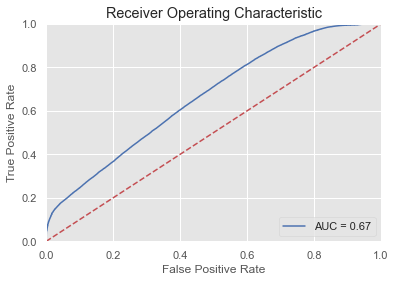

In [31]:
from sklearn.metrics import roc_curve, auc

probs               = adaboostModel2.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
print('Accuracy before tuning :',accuracy_score(y_test,adapred1))
print()
print('Accuracy after tuning :',accuracy_score(y_test,adapred2))

Accuracy before tuning : 0.5988639078385051

Accuracy after tuning : 0.6027128181987099
